In [1]:
import pandas as pd # data frame library
import seaborn as sns # data visialization library
import matplotlib.pyplot as plt
import numpy
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('uci breast cancer dataset.csv')

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
df = df.drop(['id'], axis = 'columns')

<AxesSubplot:xlabel='diagnosis', ylabel='count'>

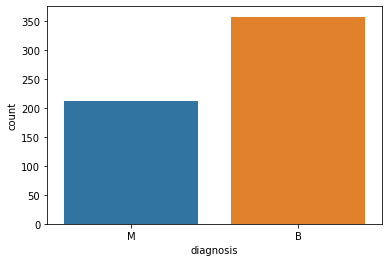

In [6]:
sns.countplot(x='diagnosis',data=df)

In [7]:
df.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [8]:
x = df.drop('diagnosis',axis=1)

In [9]:
y = df[['diagnosis']]

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,train_size=.75, random_state=42)

# Apply Decision Tree Classifier

In [12]:
from sklearn.tree import DecisionTreeClassifier

In [13]:
dt = DecisionTreeClassifier()

In [14]:
dt.fit(xtrain,ytrain) #train the model with 70% of data from dataset

DecisionTreeClassifier()

In [15]:
pred = dt.predict(xtest) # pred is corrsponding to ytest

In [16]:
ytest

,diagnosis
204,B
70,M
131,M
431,B
540,B
...,...
89,B
199,M
411,B
18,M


In [17]:
pred # Predicted value of Y

array(['B', 'M', 'M', 'B', 'B', 'M', 'M', 'M', 'B', 'M', 'B', 'M', 'B',
       'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'M',
       'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'B',
       'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'M',
       'B', 'B', 'M', 'B', 'B', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B',
       'B', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'B', 'M', 'M',
       'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B',
       'B', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'M',
       'M', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'M', 'B'],
      dtype=object)

In [18]:
dt.score(xtest,ytest)

0.9440559440559441

# Evaluate the ML model

In [19]:
from sklearn.metrics import classification_report , accuracy_score, confusion_matrix, plot_roc_curve

In [20]:
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           B       0.98      0.93      0.95        89
           M       0.90      0.96      0.93        54

    accuracy                           0.94       143
   macro avg       0.94      0.95      0.94       143
weighted avg       0.95      0.94      0.94       143



In [21]:
test_confusion_matrix = confusion_matrix(ytest,pred)

<AxesSubplot:>

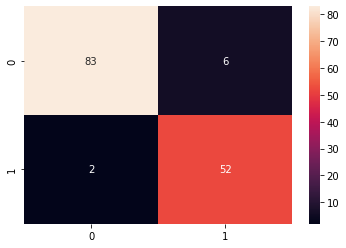

In [22]:
sns.heatmap(test_confusion_matrix, annot=True)

In [23]:
tp, fp, fn, tn = confusion_matrix(ytest,pred).reshape(-1)

In [24]:
dt.score(xtest,ytest)

0.9440559440559441

# Random Forest Classifier

In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
clf = RandomForestClassifier() # default parameters, 100 Tree = n_estimators=100

In [27]:
clf.fit(xtrain, ytrain)

RandomForestClassifier()

In [28]:
clf.score(xtest, ytest)

0.972027972027972

# Some dataset for practice

In [29]:
#https://scikit-learn.org/stable/datasets/toy_dataset.html
#https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html
#https://scikit-learn.org/stable/datasets/real_world.html

# Hyper Parameter Tuning

In [30]:
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
#https://scikit-learn.org/0.16/modules/generated/sklearn.grid_search.RandomizedSearchCV.html

# Grid Search CV

In [31]:
import numpy as np
trees = np.random.randint(15,150,30)

In [32]:
trees

array([149, 119, 131,  71, 126,  53,  35,  23,  15, 137,  38,  23,  33,
        73,  65, 100,  78,  22,  95, 113, 135,  45,  20,  96, 123,  32,
       144, 106, 113,  85])

In [33]:
param_grid={
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [34]:
from sklearn.model_selection import GridSearchCV

In [35]:
clf_grid=GridSearchCV(estimator=clf,param_grid=param_grid,cv=3)

In [36]:
clf_grid.fit(xtrain,ytrain)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [37]:
clf_grid.cv_results_

{'mean_fit_time': array([0.22619907, 0.69733453, 0.27759091, 0.61928678, 0.27891898,
        0.55718788, 0.21508749, 0.71109684, 0.21543797, 0.5601662 ,
        0.20210552, 0.5023303 , 0.22406705, 0.56214778, 0.23237475,
        0.52459828, 0.19646764, 0.50165613, 0.20711501, 0.54886627,
        0.21342953, 0.61933271, 0.20346141, 0.50829323, 0.22970613,
        0.5581789 , 0.21575809, 0.57644375, 0.23270694, 0.56350104,
        0.24336346, 0.56416702, 0.22471452, 0.6439333 , 0.21876446,
        0.53890363, 0.22708074, 0.56747452, 0.22639998, 0.55953439,
        0.2141002 , 0.53356377, 0.22439766, 0.55918042, 0.22506452,
        0.56182742, 0.21309662, 0.53058847, 0.22606881, 0.56183791,
        0.23639305, 0.6326437 , 0.22407381, 0.56380868, 0.23402667,
        0.56449397, 0.22573709, 0.56050475, 0.21442294, 0.53422769]),
 'std_fit_time': array([0.02610997, 0.06746962, 0.00995171, 0.10367136, 0.02311623,
        0.04283498, 0.00739042, 0.02053632, 0.01292975, 0.04199045,
        0.003

In [38]:
tuning_result=pd.DataFrame(clf_grid.cv_results_)

In [39]:
tuning_result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.226199,0.026110,0.017074,0.002033,gini,4,auto,200,"{'criterion': 'gini', 'max_depth': 4, 'max_fea...",0.943662,0.957746,0.957746,0.953052,0.006640,17
1,0.697335,0.067470,0.045212,0.004485,gini,4,auto,500,"{'criterion': 'gini', 'max_depth': 4, 'max_fea...",0.936620,0.957746,0.943662,0.946009,0.008783,53
2,0.277591,0.009952,0.020622,0.005886,gini,4,sqrt,200,"{'criterion': 'gini', 'max_depth': 4, 'max_fea...",0.936620,0.957746,0.950704,0.948357,0.008783,41
3,0.619287,0.103671,0.045647,0.013045,gini,4,sqrt,500,"{'criterion': 'gini', 'max_depth': 4, 'max_fea...",0.936620,0.957746,0.950704,0.948357,0.008783,41
4,0.278919,0.023116,0.016957,0.000002,gini,4,log2,200,"{'criterion': 'gini', 'max_depth': 4, 'max_fea...",0.936620,0.957746,0.957746,0.950704,0.009959,28
5,0.557188,0.042835,0.038884,0.001608,gini,4,log2,500,"{'criterion': 'gini', 'max_depth': 4, 'max_fea...",0.936620,0.957746,0.943662,0.946009,0.008783,53
6,0.215087,0.007390,0.015968,0.000016,gini,5,auto,200,"{'criterion': 'gini', 'max_depth': 5, 'max_fea...",0.957746,0.964789,0.950704,0.957746,0.005750,6
7,0.711097,0.020536,0.055179,0.022341,gini,5,auto,500,"{'criterion': 'gini', 'max_depth': 5, 'max_fea...",0.936620,0.957746,0.950704,0.948357,0.008783,41
8,0.215438,0.012930,0.015287,0.000474,gini,5,sqrt,200,"{'criterion': 'gini', 'max_depth': 5, 'max_fea...",0.943662,0.950704,0.957746,0.950704,0.005750,28
9,0.560166,0.041990,0.038233,0.000938,gini,5,sqrt,500,"{'criterion': 'gini', 'max_depth': 5, 'max_fea...",0.936620,0.957746,0.950704,0.948357,0.008783,41


In [40]:
tuning_result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   mean_fit_time       60 non-null     float64
 1   std_fit_time        60 non-null     float64
 2   mean_score_time     60 non-null     float64
 3   std_score_time      60 non-null     float64
 4   param_criterion     60 non-null     object 
 5   param_max_depth     60 non-null     object 
 6   param_max_features  60 non-null     object 
 7   param_n_estimators  60 non-null     object 
 8   params              60 non-null     object 
 9   split0_test_score   60 non-null     float64
 10  split1_test_score   60 non-null     float64
 11  split2_test_score   60 non-null     float64
 12  mean_test_score     60 non-null     float64
 13  std_test_score      60 non-null     float64
 14  rank_test_score     60 non-null     int32  
dtypes: float64(9), int32(1), object(5)
memory usage: 6.9+ KB


In [41]:
clf_grid.best_params_

{'criterion': 'entropy',
 'max_depth': 7,
 'max_features': 'sqrt',
 'n_estimators': 200}

In [42]:
clf_grid.best_score_

0.9624413145539906

In [43]:
clf2=clf_grid.best_estimator_

In [44]:
clf2

RandomForestClassifier(criterion='entropy', max_depth=7, max_features='sqrt',
                       n_estimators=200)

In [45]:
clf2.fit(xtrain,ytrain)

RandomForestClassifier(criterion='entropy', max_depth=7, max_features='sqrt',
                       n_estimators=200)

In [46]:
clf2.score(xtest,ytest)

0.972027972027972

# Randomized Search CV

In [47]:
param_grid2={
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [48]:
from sklearn.model_selection import RandomizedSearchCV

In [49]:
clf_ran=RandomizedSearchCV(clf,param_grid2,cv=3)

In [50]:
clf_ran.fit(xtrain,ytrain)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [4, 5, 6, 7, 8],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'n_estimators': [200, 500]})

In [51]:
Random_Tuning_Result=pd.DataFrame(clf_ran.cv_results_)

In [52]:
Random_Tuning_Result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_max_features,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.195480,0.002134,0.015613,0.000447,200,log2,4,gini,"{'n_estimators': 200, 'max_features': 'log2', ...",0.936620,0.950704,0.943662,0.943662,0.005750,9
1,0.503655,0.003550,0.037242,0.000464,500,sqrt,4,gini,"{'n_estimators': 500, 'max_features': 'sqrt', ...",0.936620,0.950704,0.943662,0.943662,0.005750,9
2,0.214746,0.001251,0.015628,0.000473,200,log2,5,entropy,"{'n_estimators': 200, 'max_features': 'log2', ...",0.936620,0.964789,0.957746,0.953052,0.011970,3
3,0.201121,0.001898,0.015293,0.000455,200,sqrt,4,gini,"{'n_estimators': 200, 'max_features': 'sqrt', ...",0.936620,0.957746,0.950704,0.948357,0.008783,7
4,0.509622,0.003742,0.037248,0.001252,500,sqrt,6,gini,"{'n_estimators': 500, 'max_features': 'sqrt', ...",0.943662,0.957746,0.950704,0.950704,0.005750,5
5,0.215098,0.001251,0.015630,0.000465,200,log2,7,entropy,"{'n_estimators': 200, 'max_features': 'log2', ...",0.950704,0.964789,0.950704,0.955399,0.006640,2
6,0.573807,0.012000,0.038888,0.002143,500,sqrt,7,entropy,"{'n_estimators': 500, 'max_features': 'sqrt', ...",0.964789,0.964789,0.957746,0.962441,0.003320,1
7,0.540879,0.029399,0.038239,0.000465,500,auto,5,gini,"{'n_estimators': 500, 'max_features': 'auto', ...",0.936620,0.957746,0.950704,0.948357,0.008783,7
8,0.498667,0.007067,0.036902,0.000807,500,log2,7,gini,"{'n_estimators': 500, 'max_features': 'log2', ...",0.943662,0.964789,0.950704,0.953052,0.008783,4
9,0.546202,0.005293,0.037898,0.000806,500,log2,4,entropy,"{'n_estimators': 500, 'max_features': 'log2', ...",0.936620,0.964789,0.950704,0.950704,0.011500,5


In [53]:
clf_ran.best_params_

{'n_estimators': 500,
 'max_features': 'sqrt',
 'max_depth': 7,
 'criterion': 'entropy'}

In [54]:
clf_ran.score(xtest,ytest)

0.972027972027972

In [55]:
clf3=clf_ran.best_estimator_

In [56]:
clf3.fit(xtrain,ytrain)

RandomForestClassifier(criterion='entropy', max_depth=7, max_features='sqrt',
                       n_estimators=500)

In [57]:
clf3.score(xtest,ytest)

0.972027972027972

# HyperParameter Tuning For XGBoost

In [58]:
conda install -c conda-forge xgboost

Solving environment: ...working... done

# All requested packages already installed.

Retrieving notices: ...working... done

Note: you may need to restart the kernel to use updated packages.


In [59]:
from xgboost import XGBClassifier

In [60]:
xg_clf=XGBClassifier()

In [61]:
xg_clf.fit(xtrain,ytrain)

[16:54:19] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [62]:
xg_clf.predict(xtest)

array(['B', 'M', 'M', 'B', 'B', 'M', 'M', 'M', 'M', 'B', 'B', 'M', 'B',
       'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M',
       'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'B',
       'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B',
       'B', 'B', 'M', 'B', 'B', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'B', 'M', 'M',
       'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B',
       'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'M',
       'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'M', 'B'],
      dtype=object)

In [63]:
xg_clf.score(xtest,ytest)

0.965034965034965

In [64]:
xg_clf

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

# Hyperparameter Tuning of XGBoost with GridSearchCV

In [65]:
param_grid = {
    "max_depth": [3, 4, 5, 7],
    "learning_rate": [0.1, 0.01, 0.05],
    "gamma": [0, 0.25, 1],
    "reg_lambda": [0, 1, 10],
    "scale_pos_weight": [1, 3, 5],
    "subsample": [0.8],
    "colsample_bytree": [0.5],
}              #subsample and colsample_bytree to recommended values to speed things up and prevent overfitting.

In [66]:
from sklearn.model_selection import GridSearchCV

In [67]:

# Init Grid Search
xg_grid_cv = GridSearchCV(xg_clf, param_grid, n_jobs=-1, cv=3, scoring="roc_auc")


In [68]:
# Fit
xg_grid_cv.fit(xtrain,ytrain)

[16:54:48] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1,
                                     enable_categorical=False, gamma=0,
                                     gpu_id=-1, importance_type=None,
                                     interaction_constraints='',
                                     learning_rate=0.300000012,
                                     max_delta_step=0, max_depth=6,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                                     n_estimators=10...
                                     num_parallel_tree=1, predictor='auto',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, subsample=1,
                    

In [69]:
xg_grid_result=pd.DataFrame(xg_grid_cv.cv_results_)

In [70]:
xg_grid_result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_colsample_bytree,param_gamma,param_learning_rate,param_max_depth,param_reg_lambda,param_scale_pos_weight,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.062484,0.000000e+00,0.015622,0.000000,0.5,0,0.1,3,0,1,0.8,"{'colsample_bytree': 0.5, 'gamma': 0, 'learnin...",0.998291,0.977740,0.988552,0.988194,0.008394,38
1,0.067692,7.362886e-03,0.005207,0.007364,0.5,0,0.1,3,0,3,0.8,"{'colsample_bytree': 0.5, 'gamma': 0, 'learnin...",0.998077,0.973924,0.991308,0.987770,0.010173,70
2,0.062485,2.809790e-06,0.005209,0.007366,0.5,0,0.1,3,0,5,0.8,"{'colsample_bytree': 0.5, 'gamma': 0, 'learnin...",0.997222,0.976892,0.989824,0.987979,0.008402,57
3,0.062481,0.000000e+00,0.015626,0.000000,0.5,0,0.1,3,1,1,0.8,"{'colsample_bytree': 0.5, 'gamma': 0, 'learnin...",0.997863,0.976468,0.989612,0.987981,0.008810,53
4,0.062480,0.000000e+00,0.000000,0.000000,0.5,0,0.1,3,1,3,0.8,"{'colsample_bytree': 0.5, 'gamma': 0, 'learnin...",0.998291,0.979648,0.989188,0.989042,0.007611,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319,0.098935,7.364178e-03,0.005207,0.007364,0.5,1,0.05,7,1,3,0.8,"{'colsample_bytree': 0.5, 'gamma': 1, 'learnin...",0.996795,0.977104,0.988976,0.987625,0.008095,86
320,0.098934,7.364965e-03,0.000000,0.000000,0.5,1,0.05,7,1,5,0.8,"{'colsample_bytree': 0.5, 'gamma': 1, 'learnin...",0.996795,0.975620,0.989188,0.987201,0.008758,125
321,0.083313,7.364459e-03,0.010415,0.007365,0.5,1,0.05,7,10,1,0.8,"{'colsample_bytree': 0.5, 'gamma': 1, 'learnin...",0.992308,0.976256,0.985796,0.984787,0.006592,237
322,0.093727,4.495664e-07,0.010414,0.007364,0.5,1,0.05,7,10,3,0.8,"{'colsample_bytree': 0.5, 'gamma': 1, 'learnin...",0.996581,0.975832,0.989400,0.987271,0.008604,121


In [71]:
xg_grid_cv.best_score_

0.9891818976883636

In [72]:
xg_grid_cv.best_params_

{'colsample_bytree': 0.5,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_depth': 4,
 'reg_lambda': 1,
 'scale_pos_weight': 3,
 'subsample': 0.8}

In [73]:
clf4=xg_grid_cv.best_estimator_

In [74]:
clf4.fit(xtrain,ytrain)

[16:54:48] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5,
              enable_categorical=False, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=3,
              subsample=0.8, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [75]:
clf4.score(xtest,ytest)

0.9790209790209791

In [76]:
pred=clf4.predict(xtest)

In [77]:
from sklearn.metrics import classification_report , accuracy_score, confusion_matrix, plot_roc_curve

In [78]:
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           B       0.99      0.98      0.98        89
           M       0.96      0.98      0.97        54

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



In [79]:
confusion_matrix = confusion_matrix(ytest,pred)

In [80]:
confusion_matrix

array([[87,  2],
       [ 1, 53]], dtype=int64)

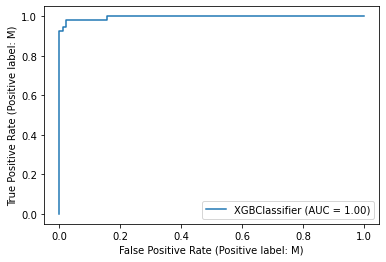

In [81]:
plot_roc_curve(clf4,xtest,ytest)

# Hyperparameter Tuning of XGBoost with Randomized Search

In [82]:
from sklearn.model_selection import RandomizedSearchCV

In [83]:
param_grid = {
    "max_depth": [3, 4, 5, 7],
    "learning_rate": [0.1, 0.01, 0.05],
    "gamma": [0, 0.25, 1],
    "reg_lambda": [0, 1, 10],
    "scale_pos_weight": [1, 3, 5],
    "subsample": [0.8],
    "colsample_bytree": [0.5],
}              #subsample and colsample_bytree to recommended values to speed things up and prevent overfitting.

In [84]:
xg_ran_cv=RandomizedSearchCV(xg_clf, param_grid, n_jobs=-1, cv=3, scoring="roc_auc")

In [85]:
xg_ran_cv.fit(xtrain,ytrain)

[16:54:49] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1,
                                           enable_categorical=False, gamma=0,
                                           gpu_id=-1, importance_type=None,
                                           interaction_constraints='',
                                           learning_rate=0.300000012,
                                           max_delta_step=0, max_depth=6,
                                           min_child_weight=1, missing=nan,
                                           monotone_constraints='()',
                                           n_estimat...
                                           predictor='auto', random_state=0,
                                           reg_alpha=0, reg_

In [86]:
xg_ran_cv.best_score_

0.9884051261515752

In [87]:
xg_ran_cv.best_params_

{'subsample': 0.8,
 'scale_pos_weight': 5,
 'reg_lambda': 0,
 'max_depth': 3,
 'learning_rate': 0.1,
 'gamma': 1,
 'colsample_bytree': 0.5}

In [88]:
clf6=xg_ran_cv.best_estimator_

In [89]:
clf6.fit(xtrain,ytrain)

[16:54:49] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5,
              enable_categorical=False, gamma=1, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=0, scale_pos_weight=5,
              subsample=0.8, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [90]:
pred=clf6.predict(xtest)

In [91]:
clf6.score(xtest,ytest)

0.965034965034965

In [92]:
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           B       0.99      0.96      0.97        89
           M       0.93      0.98      0.95        54

    accuracy                           0.97       143
   macro avg       0.96      0.97      0.96       143
weighted avg       0.97      0.97      0.97       143

